# Results_analysis

In the folowing code:
1. We analyse the dialogues properties of our new dataset and the automatical one.
2. We estimate the performance of the vader intensity polirizer, the EmoBert classifier and the Plutchik mapping.
3. We compute some correlation between different variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import plot
import pickle
import os
import time
import nltk
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
# Change in the original display settings
from matplotlib import rc
font = {'family' : 'times new roman',
        'weight' : 400,
        'size'   : 19}

plt.rc('font', **font)

In [3]:
neutral = [ 'agreeing', # neutral
            'acknowledging', # neutral 
            'encouraging', # neutral 
            'consoling', # neutral 
            'sympathizing', # neutral 
            'suggesting', # neutral 
            'questioning', # neutral 
            'wishing', # neutral
            'neutral']

Basics = [ 'Anticipation',
            'Joy', 
            'Trust',
            'Fear',
            'Suprise',
            'Sadness',
            'Disgust',
            'anger']
feelings = ['Optimism',
            'love', 
            'Submission',
            'Disapproval',
            'Remorse',
            'Agressiveness',
            'Disgust']


In [15]:
# In th following dataframe contain only the main information of each dialog. You will not found the text of the dialog
# result     := Manual subset information
# result_TA  := Automatic subset information
# result_TA2 := Automatic subset with Vader information

result =  pd.read_pickle("Manual_subset_info.pkl")
result_TA =  pd.read_pickle("Result_TA.pkl")
result_TA2 =  pd.read_pickle("Automatic_subset_info_vader.pkl")

In [16]:
# Small adjustment
result.rename(columns={'size':'Size'}, 
                 inplace=True)

In [17]:
def nbr_row(df1):   
    """
    Input : Dataframe
    Output: Statistics on the Number of turn in a dialogs 
    """
    Nbr_row = df1["Nbr_Row"].astype(int).value_counts().to_frame().rename_axis("#Row").rename(columns={"Nbr_Row": '#Dialogs'})
    Nbr_row["%"] = Nbr_row["#Dialogs"]/df1.shape[0] *100
    Nbr_row.sort_index(ascending=True, inplace=True)
    Nbr_row["cumsum"] = Nbr_row["%"].cumsum()
    return Nbr_row

In [18]:
def size(df1):
    """
    Input : Dataframe
    Output: Statistics on the mean size of a turn inside a dialog 
    """  
    Size = df1["Size"].astype(int).value_counts().to_frame().rename_axis("Mean #Words").rename(columns={"Size": '#Dialogs'})
    Size["%"] = Size["#Dialogs"]/df1.shape[0] *100
    Size.sort_index(ascending=True, inplace=True)
    Size["cumsum"] = Size["%"].cumsum()
    print(df1.shape[0])
    return Size

In [19]:
def dataframe_emoBert(df1):
    """
    Input : Dataframe
    Output: Prominent EmoBert Analysis 
    """ 
    Dataframe_EmoBert = df1.Prominent_EmoBert.value_counts().to_frame().rename_axis("Prominent_EmoBert").rename(columns={"Prominent_EmoBert": '#Dialogs'})
    Dataframe_EmoBert["%"] = Dataframe_EmoBert["#Dialogs"]/df1.shape[0] *100
    Dataframe_EmoBert["cumsum"] = Dataframe_EmoBert["%"].cumsum()
    return Dataframe_EmoBert

In [20]:
def dataframe_Plutchik(df1):
    """
    Input : Dataframe
    Output: Prominent Plutchik Analysis 
    """ 
    Dataframe_Plutchik = df1.Prominent_Plutchik.value_counts().to_frame().rename_axis("Prominent_Plutchik").rename(columns={"Prominent_Plutchik": '#Dialogs'})
    Dataframe_Plutchik["%"] = Dataframe_Plutchik["#Dialogs"]/df1.shape[0] *100
    Dataframe_Plutchik["cumsum"] = Dataframe_Plutchik["%"].cumsum()
    return Dataframe_Plutchik

In [21]:
def basics_feelings (df1):
    """
    Input : Dataframe
    Output: Prominent Plutchik Analysis 
    """ 
    intermediate = df1["Prominent_Plutchik"].value_counts().to_frame().rename(columns={"Prominent_Plutchik": '#Dialogs'})
    intermediate ["%"] = intermediate ["#Dialogs"]/df1.shape[0] *100

    return intermediate

# Analysis of the turn's numbers in a dialog

In this section we will compare the dialogues properties of our new dataset and the automatical one.
We will analyse the three folowing aspect for both subset : 
  1. The cumulative function of the number of turns in a dialog
  2. The distribution in the subsets of the turn's number in a dialog
  3. The boxplot of the distributions

In [22]:
# Content Automatic Subset
result_TA

,Size,Nbr_Row,Prominent_score,Prominent_EmoBert,Prominent_Plutchik,Neutrality_score,Emotionality_score
dialogue_id,,,,,,,
489,18.461538,13,0.282008,questioning,neutral,0.594712,0.405288
492,17.786408,103,0.253030,questioning,neutral,0.450766,0.549234
1384,32.750000,4,0.165573,questioning,neutral,0.430981,0.569019
1386,18.166667,6,0.196928,questioning,neutral,0.347631,0.652369
1393,12.300000,40,0.229517,questioning,neutral,0.547738,0.452262
...,...,...,...,...,...,...,...
8816953,31.000000,37,0.270424,questioning,neutral,0.475151,0.524849
8816959,21.250000,4,0.459001,questioning,neutral,0.496461,0.503539
8819123,18.965517,29,0.165609,questioning,neutral,0.446343,0.553657


In [23]:
# Content Manual Subset
result

,Size,Vader,Nbr_Row,Prominent_score,Prominent_EmoBert,Prominent_Plutchik,Neutrality_score,Emotionality_score
Num_dialog,,,,,,,,
489,17.111111,-0.233722,9,0.547907,questioning,neutral,0.827815,0.172185
492,24.343284,-0.042348,67,0.196602,questioning,neutral,0.389110,0.610890
1384,41.500000,0.515850,2,0.224641,questioning,neutral,0.535989,0.464011
1386,19.000000,0.050667,3,0.340702,questioning,neutral,0.396648,0.603352
1393,20.000000,0.390500,2,0.684105,questioning,neutral,0.747474,0.252526
...,...,...,...,...,...,...,...,...
8816953,54.500000,-0.041850,2,0.174564,embarrassed,Disapproval,0.100357,0.899642
8816959,18.000000,-0.282550,2,0.316655,sad,Sadness,0.017549,0.982451
8819123,25.750000,-0.236325,4,0.143581,questioning,neutral,0.309734,0.690266


In [24]:
# Get statistics about the number of turn in a dialog
Nbr_row = nbr_row(result)
Nbr_row_TA = nbr_row(result_TA)

In [25]:
Nbr_row_TA.head(20)

,#Dialogs,%,cumsum
#Row,,,
1,1344,3.807581,3.807581
2,1693,4.796306,8.603887
3,1781,5.045612,13.649499
4,1695,4.801972,18.451470
5,1615,4.575330,23.026800
6,1542,4.368519,27.395320
7,1446,4.096549,31.491869
8,1358,3.847243,35.339113
9,1255,3.555442,38.894555


In [26]:
Nbr_row.head(20)

,#Dialogs,%,cumsum
#Row,,,
2,13877,39.313842,39.313842
3,6799,19.261715,58.575557
4,3890,11.020454,69.596011
5,2508,7.105218,76.701230
6,1742,4.935124,81.636353
7,1191,3.374129,85.010482
8,880,2.493059,87.503541
9,644,1.824466,89.328007
10,511,1.447674,90.775681


In [ ]:
#Plot cumulative

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Nbr_row["cumsum"][0:100],label= "Manual Subset")
ax.plot(Nbr_row_TA["cumsum"][0:100],label= "Automatic Subset")

ax.set(xlabel='# Turn in a dialog', ylabel='Cumulative Sum %',
       title='Cumulative function : # Turn in a dialog')
plt.legend()

plt.savefig(r"C:\Users\stan\Desktop\Rapport_Semester\Image\Cumulative_sentence.png", 
            #This is simple recomendation for publication plots
            dpi=1000, 
            # Plot will be occupy a maximum of available space
            bbox_inches='tight', 
            )

# Barplot

Nbr_row["#Row"]= Nbr_row.index.values.tolist()

Nbr_row_TA["#Row"]= Nbr_row_TA.index.values.tolist()

fig,ax = plt.subplots(figsize=(20, 6))

plt.bar(Nbr_row["#Row"][0:100],Nbr_row["#Dialogs"][0:100],alpha = 0.9,label="Manual Subset")
plt.bar(Nbr_row_TA["#Row"][0:100],Nbr_row_TA["#Dialogs"][0:100],alpha = 0.6,label="Automatic Subset")

ax.set_yscale('log')
plt.xlabel('# turn')
plt.ylabel('# Dialogues in log scale')
plt.title('# Dialogues that contain # turn')
plt.legend()
plt.savefig(r"C:\Users\stan\Desktop\Rapport_Semester\Image\BarPlot_row.png", 
            #This is simple recomendation for publication plots
            dpi=1000, 
            # Plot will be occupy a maximum of available space
            bbox_inches='tight', 
            )
plt.show()

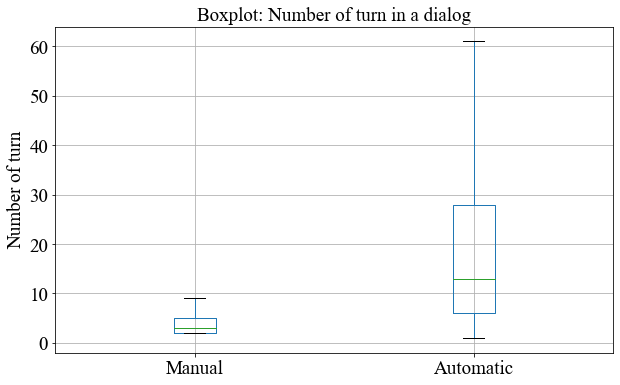

Boxplot info for manual subset : 
 count    35298.000000
mean         5.536489
std         13.206985
min          2.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        884.000000
Name: Nbr_Row, dtype: float64 

Boxplot info for automatic subset : 
 count    35298.000000
mean        23.682588
std         34.624759
min          1.000000
25%          6.000000
50%         13.000000
75%         28.000000
max        985.000000
Name: Nbr_Row, dtype: float64


In [94]:
# Boxplot

test2 = result[["Nbr_Row"]].copy().rename(columns={"Nbr_Row": "Manual"})
test2["Automatic"] = result_TA["Nbr_Row"]

fig, ax = plt.subplots(figsize=(10, 6))
test2.boxplot(showfliers=False, fontsize=19)

plt.ylabel('Number of turn',fontsize=19,fontname="times new roman")
plt.title('Boxplot: Number of turn in a dialog',fontsize=19,fontname="times new roman")

plt.savefig(r"C:\Users\stan\Desktop\Rapport_Semester\Image\Boxplot2.png", 
            #This is simple recomendation for publication plots
            dpi=1000, 
            # Plot will be occupy a maximum of available space
            bbox_inches='tight', 
            )
plt.show()


print("Boxplot info for manual subset : \n", result.Nbr_Row.describe(),"\n")
print("Boxplot info for automatic subset : \n", result_TA.Nbr_Row.describe())

# Analysis of the turn mean size in a dialog 

In this section we will compare the dialogues properties of our new dataset and the automatical one.
We will analyse the two folowing aspect for both subset : 

  1. The cumulative function of the turn mean size in a dialog 
  2. The distribution in the subsets of the turn mean size in a dialog 

In [95]:
# Get statistics about the number of the turn mean size in a dialog 
Size    = size(result)
Size_TA = size(result_TA)
Size.head(20)

35298
35298


,#Dialogs,%,cumsum
Mean #Words,,,
1,33,0.093490,0.093490
2,281,0.796079,0.889569
3,409,1.158706,2.048275
4,623,1.764973,3.813247
5,757,2.144597,5.957845
6,820,2.323078,8.280922
7,845,2.393903,10.674826
8,904,2.561052,13.235877
9,926,2.623378,15.859255


In [96]:
Size_TA.head(20)

,#Dialogs,%,cumsum
Mean #Words,,,
3,10,0.028330,0.028330
4,56,0.158649,0.186979
5,113,0.320131,0.507111
6,216,0.611933,1.119044
7,364,1.031220,2.150263
8,598,1.694147,3.844410
9,782,2.215423,6.059833
10,1011,2.864185,8.924018
11,1244,3.524279,12.448297


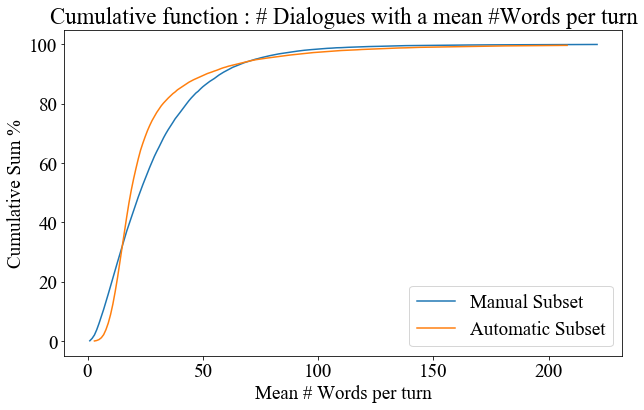

In [97]:
# Plot cumulative
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Size["cumsum"][0:200],label= "Manual Subset")
ax.plot(Size_TA["cumsum"][0:200],label= "Automatic Subset")

ax.set(xlabel='Mean # Words per turn', ylabel='Cumulative Sum %',
       title='Cumulative function : # Dialogues with a mean #Words per turn')

plt.legend()

plt.savefig(r"C:\Users\stan\Desktop\Rapport_Semester\Image\Cumulative_words.png", 
            #This is simple recomendation for publication plots
            dpi=1000, 
            # Plot will be occupy a maximum of available space
            bbox_inches='tight', 
            )

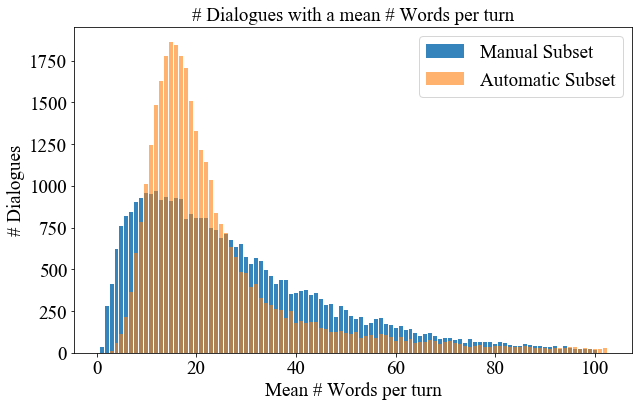

In [98]:
# barplot

Size["#Words"]= Size.index.values.tolist()
Size_TA["#Words"]= Size_TA.index.values.tolist()
fig, ax = plt.subplots(figsize=(10, 6))

plt.bar(Size["#Words"][0:100],Size["#Dialogs"][0:100],alpha = 0.9,label="Manual Subset")
plt.bar(Size_TA["#Words"][0:100],Size_TA["#Dialogs"][0:100],alpha = 0.6,label="Automatic Subset")

#ax.set_yscale('log')
plt.xlabel('Mean # Words per turn',fontname="times new roman")
plt.ylabel('# Dialogues',fontname="times new roman")
plt.title('# Dialogues with a mean # Words per turn',fontsize=19,fontname="times new roman")
plt.legend()
plt.savefig(r"C:\Users\stan\Desktop\Rapport_Semester\Image\BarPlot_words.png", 
            #This is simple recomendation for publication plots
            dpi=1000, 
            # Plot will be occupy a maximum of available space
            bbox_inches='tight', 
            )
plt.show()

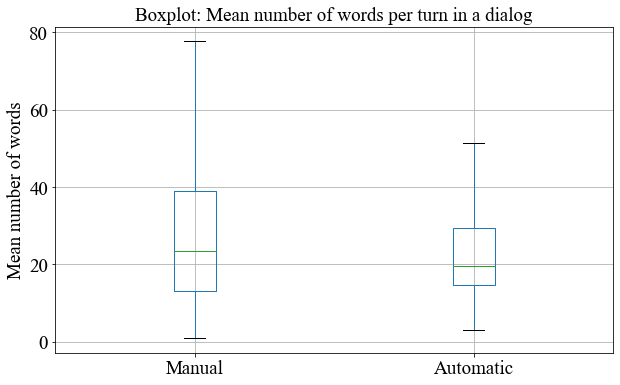

Boxplot info for manual subset : 
 count    35298.000000
mean        29.642307
std         23.999287
min          1.000000
25%         13.250000
50%         23.500000
75%         39.000000
max        340.500000
Name: Size, dtype: float64 

Boxplot info for automatic subset : 
 count    35298.000000
mean        28.166272
std         30.078487
min          3.000000
25%         14.700000
50%         19.714286
75%         29.428046
max       1432.000000
Name: Size, dtype: float64


In [66]:
# Boxplot

test = result[["Size"]].copy().rename(columns={"Size": "Manual"})
test["Automatic"] = result_TA["Size"]

fig, ax = plt.subplots(figsize=(10, 6))
test.boxplot(showfliers=False, fontsize=19)

plt.ylabel('Mean number of words',fontsize=19,fontname="times new roman")
plt.title('Boxplot: Mean number of words per turn in a dialog',fontsize=19,fontname="times new roman")

plt.savefig(r"C:\Users\stan\Desktop\Rapport_Semester\Image\Boxplot.png", 
            #This is simple recomendation for publication plots
            dpi=1000, 
            # Plot will be occupy a maximum of available space
            bbox_inches='tight', 
            )
plt.show()


print("Boxplot info for manual subset : \n", result.Size.describe(),"\n")
print("Boxplot info for automatic subset : \n", result_TA.Size.describe())

# Vader Analyse

In the following part we analyse the Vader Score of both subset.

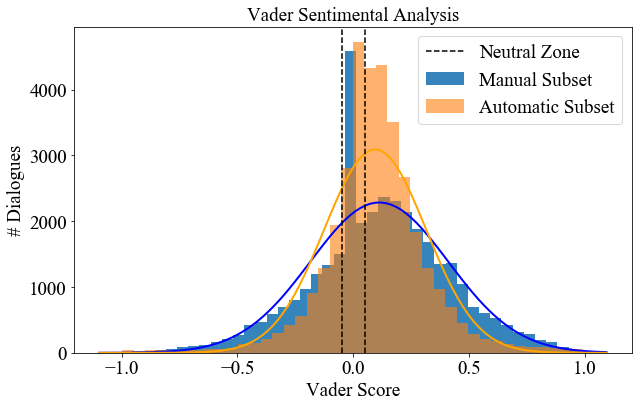

In [99]:
mu, std = norm.fit(result["Vader"])
mu_TA, std_TA = norm.fit(result_TA2["Vader"])
fig, ax = plt.subplots(figsize=(10, 6))

n, bins, _ = plt.hist(result["Vader"],bins=40,alpha = 0.9,label="Manual Subset")
_, bins_TA, _ = plt.hist(result_TA2["Vader"],bins=40,alpha = 0.6,label="Automatic Subset")

xmin, xmax = plt.xlim()
x    = np.linspace(xmin, xmax, 100)
p    = norm.pdf(x, mu, std)* sum(n * np.diff(bins))
p_TA = norm.pdf(x, mu_TA, std_TA)* sum(n * np.diff(bins))
plt.plot(x, p, 'b', linewidth=2)
plt.plot(x, p_TA, color='orange', linewidth=2)
#ax.set_yscale('log')

plt.xlabel('Vader Score',fontname="times new roman")
plt.ylabel('# Dialogues',fontname="times new roman")
plt.title('Vader Sentimental Analysis',fontsize=19,fontname="times new roman")
plt.axvline(x=0.05,linewidth=1.5,color = "Black",linestyle='--')
plt.axvline(x=-0.05,linewidth=1.5,color = "Black",linestyle='--',label = "Neutral Zone")
plt.legend()

plt.savefig(r"C:\Users\stan\Desktop\Rapport_Semester\Image\Vader.png", 
            #This is simple recomendation for publication plots
            dpi=1000, 
            # Plot will be occupy a maximum of available space
            bbox_inches='tight', 
            )
plt.show()

In [100]:
Total = result.shape[0]

# Manual
Neutral = result[(result.Vader>=-0.05) & (result.Vader<=0.05)]["Vader"].count()
Positive = result[(result.Vader>0.05)]["Vader"].count()
Negative = result[(result.Vader<-0.05)]["Vader"].count()
print("Manual: Number of neutral dialog",Neutral,"it represent :",Neutral/Total*100,"%")
print("Manual: Number of positive dialog",Positive,"it represent :",Positive/Total*100,"%" )
print("Manual: Number of negative dialog",Negative,"it represent :",Negative/Total*100,"%")

# Automatic
Neutral_TA = result_TA2[(result_TA2.Vader>=-0.05) & (result_TA2.Vader<=0.05)]["Vader"].count()
Positive_TA = result_TA2[(result_TA2.Vader>0.05)]["Vader"].count()
Negative_TA = result_TA2[(result_TA2.Vader<-0.05)]["Vader"].count()
print("Automatic: Number of neutral dialog",Neutral_TA,"it represent :",Neutral_TA/Total*100,"%")
print("Automatic: Number of positive dialog",Positive_TA,"it represent :",Positive_TA/Total*100,"%")
print("Automatic: Number of negative dialog",Negative_TA,"it represent :",Negative_TA/Total*100,"%")

Manual: Number of neutral dialog 6588 it represent : 18.66394696583376 %
Manual: Number of positive dialog 20080 it represent : 56.88707575500028 %
Manual: Number of negative dialog 8630 it represent : 24.44897727916596 %
Automatic: Number of neutral dialog 7596 it represent : 21.519632840387555 %
Automatic: Number of positive dialog 21258 it represent : 60.22437531871494 %
Automatic: Number of negative dialog 6444 it represent : 18.2559918408975 %


# Prominent_EmoBert Analyse

In the following part we analyse the prominent EmoBert class of both subset.
   1. On all the category
   2. Merging all the neutral category
   3. Whithout the neutral Category

In [72]:
df1 = result.Prominent_EmoBert.value_counts().to_frame().rename(columns={"Prominent_EmoBert": 'Prominent_EmoBert_manual'})
df2 = result_TA.Prominent_EmoBert.value_counts().to_frame().rename(columns={"Prominent_EmoBert": 'Prominent_EmoBert_auto'})
EmoBert = pd.concat([df1, df2], axis=1,sort=True)
EmoBert_df = EmoBert.sort_values(by=['Prominent_EmoBert_manual'], ascending=False)
index  = EmoBert_df.index.tolist()

In [73]:
Dataframe_EmoBert    = dataframe_emoBert(result)
Dataframe_EmoBert_TA = dataframe_emoBert(result_TA)

In [74]:
Dataframe_EmoBert 

,#Dialogs,%,cumsum
Prominent_EmoBert,,,
questioning,13016,36.874610,36.874610
agreeing,2606,7.382855,44.257465
afraid,1749,4.954955,49.212420
apprehensive,1417,4.014392,53.226812
angry,1271,3.600771,56.827582
neutral,1225,3.470452,60.298034
confident,1145,3.243810,63.541844
proud,1030,2.918012,66.459856
acknowledging,953,2.699870,69.159726


In [75]:
Dataframe_EmoBert_TA

,#Dialogs,%,cumsum
Prominent_EmoBert,,,
questioning,24687,69.938807,69.938807
agreeing,1761,4.988951,74.927758
proud,965,2.733866,77.661624
afraid,930,2.634710,80.296334
confident,698,1.977449,82.273783
apprehensive,565,1.600657,83.874440
neutral,549,1.555329,85.429769
angry,529,1.498668,86.928438
impressed,417,1.181370,88.109808


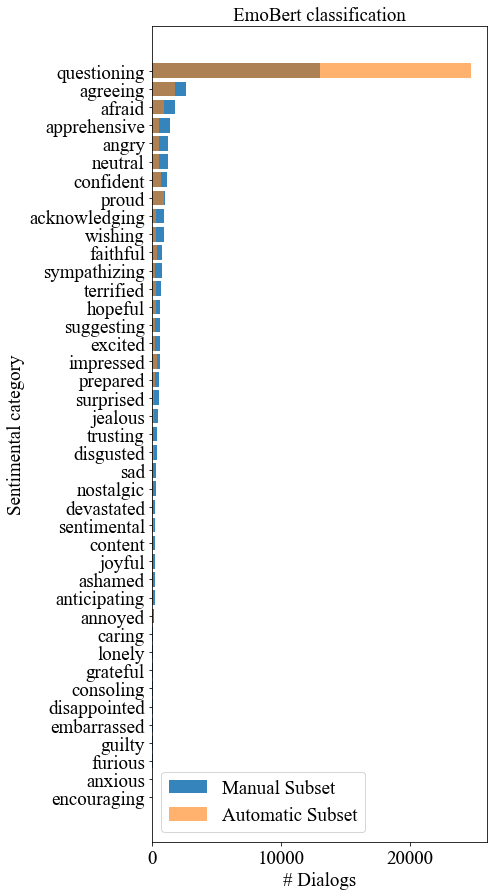

In [76]:
f, ax = plt.subplots(figsize=(6, 15))
plt.barh(index,EmoBert_df ['Prominent_EmoBert_manual'].values,alpha = 0.9,label="Manual Subset")
plt.barh(index,EmoBert_df["Prominent_EmoBert_auto"].values,alpha = 0.6,label="Automatic Subset")
plt.xlabel('# Dialogues',fontname="times new roman")
plt.ylabel('Sentimental category',fontname="times new roman")
plt.title('EmoBert classification',fontsize=19,fontname="times new roman")
plt.legend()
ax.invert_yaxis()
#plt.bar(Size_TA["#Words"][0:100],Size_TA["#Dialogs"][0:100],alpha = 0.6,label="Automatic_segmented")

### Merging neutral category

In [113]:
result_neutral = result.copy()
result_neutral_TA = result_TA.copy()

In [114]:
result_neutral ["Prominent_EmoBert"] = result_neutral.Prominent_EmoBert.replace(neutral, "neutral")
result_neutral_TA["Prominent_EmoBert"] = result_neutral_TA.Prominent_EmoBert.replace(neutral, "neutral")

In [115]:
df1 = result_neutral.Prominent_EmoBert.value_counts().to_frame().rename(columns={"Prominent_EmoBert": 'Prominent_EmoBert_manual'})
df2 = result_neutral_TA.Prominent_EmoBert.value_counts().to_frame().rename(columns={"Prominent_EmoBert": 'Prominent_EmoBert_auto'})
EmoBert = pd.concat([df1, df2], axis=1,sort=True)
EmoBert_df2 = EmoBert.sort_values(by=['Prominent_EmoBert_manual'], ascending=False)
index2  = EmoBert_df2.index.tolist()

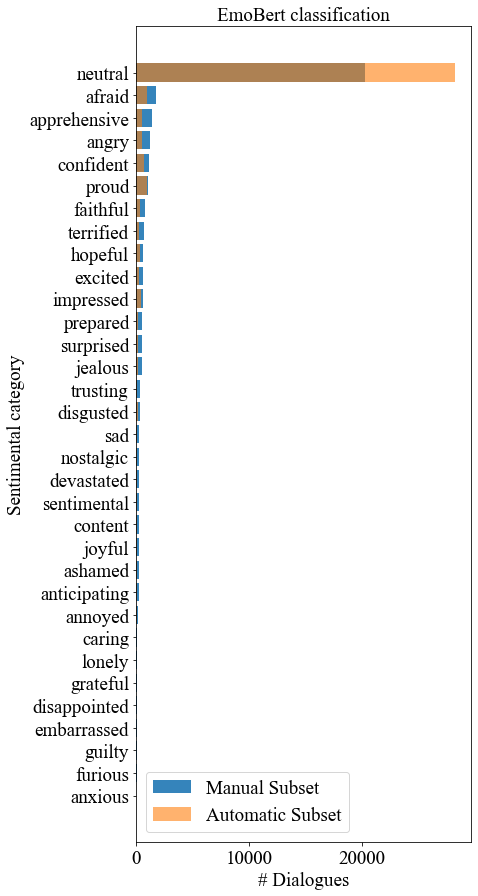

In [124]:
f, ax = plt.subplots(figsize=(6, 15))
plt.barh(index2,EmoBert_df2 ['Prominent_EmoBert_manual'].values,alpha = 0.9,label="Manual Subset")
plt.barh(index2,EmoBert_df2["Prominent_EmoBert_auto"].values,alpha = 0.6,label="Automatic Subset")
plt.xlabel('# Dialogues',fontname="times new roman")
plt.ylabel('Sentimental category',fontname="times new roman")
plt.title('EmoBert classification',fontsize=19,fontname="times new roman")
plt.legend()
ax.invert_yaxis()

In [118]:
Dataframe_EmoBert    = dataframe_emoBert(result_neutral )
Dataframe_EmoBert_TA = dataframe_emoBert(result_neutral_TA)

In [119]:
print("Number of dialogues sentimantally colored for manual : ", result_neutral.shape[0]-Dataframe_EmoBert["#Dialogs"][0])
print("Number of dialogues sentimantally colored for automatic : ", result_neutral_TA.shape[0]-Dataframe_EmoBert_TA["#Dialogs"][0])

Number of dialogues sentimantally colored for manual :  15064
Number of dialogues sentimantally colored for automatic :  7077


In [120]:
print("In the manual_segmented dataset, there is:", Dataframe_EmoBert["%"][0],"% of neutrally colored dialogs" )
print("In the automatic_segmented dataset, there is:", Dataframe_EmoBert_TA["%"][0],"% of neutrally colored dialogs" )

In the manual_segmented dataset, there is: 57.323361096946 % of neutrally colored dialogs
In the automatic_segmented dataset, there is: 79.95070542240353 % of neutrally colored dialogs


In [121]:
# Remouving Neutral element
result_sentimental = result_neutral[~(result_neutral["Prominent_EmoBert"]=="neutral")].copy()
result_sentimental_TA = result_neutral_TA[~(result_neutral_TA["Prominent_EmoBert"]=="neutral")].copy()

In [122]:
df1 = result_sentimental.Prominent_EmoBert.value_counts().to_frame().rename(columns={"Prominent_EmoBert": 'Prominent_EmoBert_manual'})
df2 = result_sentimental_TA.Prominent_EmoBert.value_counts().to_frame().rename(columns={"Prominent_EmoBert": 'Prominent_EmoBert_auto'})
EmoBert = pd.concat([df1, df2], axis=1,sort=True)
EmoBert_df3 = EmoBert.sort_values(by=['Prominent_EmoBert_manual'], ascending=False)
index3  = EmoBert_df3.index.tolist()

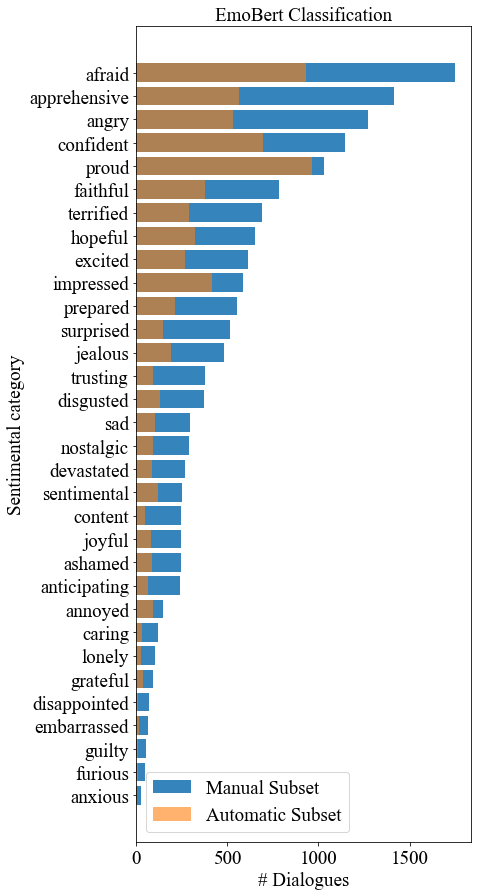

In [125]:
f, ax = plt.subplots(figsize=(6, 15))
plt.barh(index3,EmoBert_df3 ['Prominent_EmoBert_manual'].values,alpha = 0.9,label="Manual Subset")
plt.barh(index3,EmoBert_df3["Prominent_EmoBert_auto"].values,alpha = 0.6,label="Automatic Subset")
plt.xlabel('# Dialogues',fontname="times new roman")
plt.ylabel('Sentimental category',fontname="times new roman")
plt.title('EmoBert Classification',fontsize=19,fontname="times new roman")
plt.legend()
ax.invert_yaxis()
plt.savefig(r"C:\Users\stan\Desktop\Rapport_Semester\Image\EmoBert.png", 
            #This is simple recomendation for publication plots
            dpi=1000, 
            # Plot will be occupy a maximum of available space
            bbox_inches='tight', 
            )

# Prominent_Plutchik Analyse # Whithout neutral element 

In this section we analyse the prominent Plutchik emotion category. Note that we remove the neutral category

In [126]:
# Need to sum trust
result_sentimental["Prominent_Plutchik"].replace({"trust": "Trust"}, inplace=True)
result_sentimental_TA["Prominent_Plutchik"].replace({"trust": "Trust"}, inplace=True)

In [127]:
df1 = result_sentimental.Prominent_Plutchik.value_counts().to_frame().rename(columns={"Prominent_Plutchik": 'Prominent_Plutchik_manual'})
df2 = result_sentimental_TA.Prominent_Plutchik.value_counts().to_frame().rename(columns={"Prominent_Plutchik": 'Prominent_Plutchik_auto'})
plutchik = pd.concat([df1, df2], axis=1,sort=True)
plutchik_df = plutchik.sort_values(by=['Prominent_Plutchik_manual'], ascending=False)
index4  = plutchik_df.index.tolist()

In [128]:
plutchik_df


,Prominent_Plutchik_manual,Prominent_Plutchik_auto
Fear,3884,1792
Trust,1618,829
anger,1464,635
Anticipation,1450,604
Sadness,1280,444
Joy,1110,399
Suprise,1101,563
Optimism,1030,965
Submission,783,379
Agressiveness,484,189


In [129]:
Dataframe_Plutchik = dataframe_Plutchik(result_sentimental)
Dataframe_Plutchik_TA = dataframe_Plutchik(result_sentimental_TA)

In [130]:
Dataframe_Plutchik

,#Dialogs,%,cumsum
Prominent_Plutchik,,,
Fear,3884,25.783324,25.783324
Trust,1618,10.740839,36.524164
anger,1464,9.718534,46.242698
Anticipation,1450,9.625597,55.868295
Sadness,1280,8.497079,64.365374
Joy,1110,7.368561,71.733935
Suprise,1101,7.308816,79.042751
Optimism,1030,6.837493,85.880244
Submission,783,5.197823,91.078067


In [131]:
Dataframe_Plutchik_TA

,#Dialogs,%,cumsum
Prominent_Plutchik,,,
Fear,1792,25.321464,25.321464
Optimism,965,13.635721,38.957185
Trust,829,11.714003,50.671188
anger,635,8.972729,59.643917
Anticipation,604,8.534690,68.178607
Suprise,563,7.955348,76.133955
Sadness,444,6.273845,82.407800
Joy,399,5.637982,88.045782
Submission,379,5.355377,93.401159


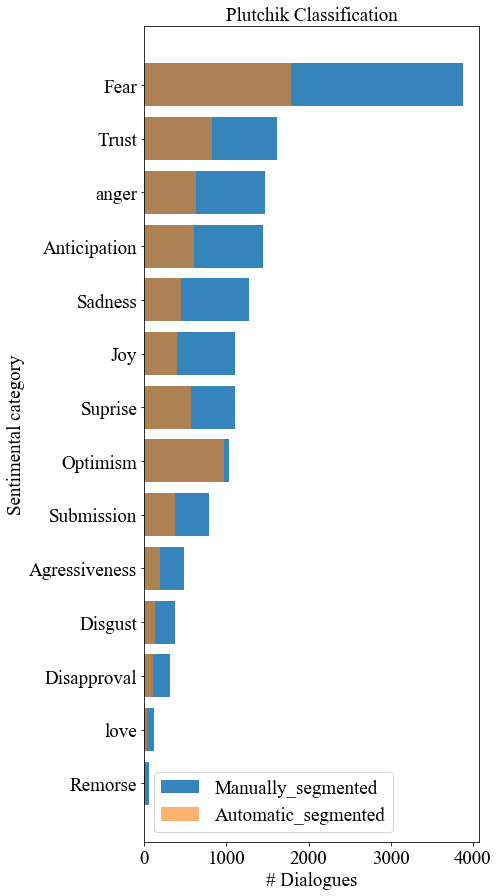

In [132]:
f, ax = plt.subplots(figsize=(6, 15))
plt.barh(index4,plutchik_df ['Prominent_Plutchik_manual'].values,alpha = 0.9,label="Manually_segmented")
plt.barh(index4,plutchik_df['Prominent_Plutchik_auto'].values,alpha = 0.6,label="Automatic_segmented")
plt.xlabel('# Dialogues',fontname="times new roman")
plt.ylabel('Sentimental category',fontname="times new roman")
plt.title('Plutchik Classification',fontsize=19,fontname="times new roman")
plt.legend()
ax.invert_yaxis()
plt.savefig(r"C:\Users\stan\Desktop\Rapport_Semester\Image\Plutchik.png", 
            #This is simple recomendation for publication plots
            dpi=1000, 
            # Plot will be occupy a maximum of available space
            bbox_inches='tight', 
            )

In [133]:
result_test    = result_sentimental.replace(Basics , "basics").copy()
result_test_TA = result_sentimental_TA.replace(Basics , "basics").copy()
result_test.replace(feelings , "feelings",inplace = True)
result_test_TA.replace(feelings , "feelings",inplace = True)

df2    = basics_feelings (result_test)
df2_TA = basics_feelings (result_test_TA)

# Manual
df2.head(2)

,#Dialogs,%
basics,12282,81.53213
feelings,2782,18.46787


In [134]:
# Automatic
df2_TA.head(2)

,#Dialogs,%
basics,5399,76.289388
feelings,1678,23.710612


In [ ]:
Solution =  pd.read_pickle(r"C:\Users\stan\Desktop\SEMESTER_PROJECT\Emotion_Analyse\output.pkl")

In [109]:
# Sample of fear, Trust, anger, Sadness, Disgust 

# Take dialogues id
fear           = result.loc[result["Prominent_Plutchik"]=="Fear"].index.values.tolist()[0:100]
Trust          = result.loc[result["Prominent_Plutchik"]=="Trust"].index.values.tolist()[0:100]
Anger          = result.loc[result["Prominent_Plutchik"]=="anger"].index.values.tolist()[0:100]
Anticipation   = result.loc[result["Prominent_Plutchik"]=="Anticipation"].index.values.tolist()[0:100]
Sadness        = result.loc[result["Prominent_Plutchik"]=="Sadness"].index.values.tolist()[0:100]
Joy            = result.loc[result["Prominent_Plutchik"]=="joy"].index.values.tolist()[0:100]
Suprise        = result.loc[result["Prominent_Plutchik"]=="Suprise"].index.values.tolist()[0:100]
Optimism       = result.loc[result["Prominent_Plutchik"]=="Optimism"].index.values.tolist()[0:100]
Submission     = result.loc[result["Prominent_Plutchik"]=="Submission"].index.values.tolist()[0:100]
Agressiveness  = result.loc[result["Prominent_Plutchik"]=="Agressiveness"].index.values.tolist()[0:100]
Disgust        = result.loc[result["Prominent_Plutchik"]=="Disgust"].index.values.tolist()[0:100]
Disapproval    = result.loc[result["Prominent_Plutchik"]=="Disapproval"].index.values.tolist()[0:100]
Love           = result.loc[result["Prominent_Plutchik"]=="love"].index.values.tolist()[0:50]
Remorse        = result.loc[result["Prominent_Plutchik"]=="Remorse"].index.values.tolist()[0:10]

# Take 100 sample with text
exemple_fear         = Solution[Solution["Num_dialog"].isin(fear)][["Num_dialog","character","Text"]]
exemple_Trust        = Solution[Solution["Num_dialog"].isin(Trust)][["Num_dialog","character","Text"]]
exemple_Anger        = Solution[Solution["Num_dialog"].isin(Anger)][["Num_dialog","character","Text"]]
exemple_Anticipation = Solution[Solution["Num_dialog"].isin(Anticipation)][["Num_dialog","character","Text"]]
exemple_Sadness      = Solution[Solution["Num_dialog"].isin(Sadness)][["Num_dialog","character","Text"]]
exemple_Joy          = Solution[Solution["Num_dialog"].isin(Joy)][["Num_dialog","character","Text"]]
exemple_Suprise      = Solution[Solution["Num_dialog"].isin(Suprise)][["Num_dialog","character","Text"]]
exemple_Optimism     = Solution[Solution["Num_dialog"].isin(Optimism)][["Num_dialog","character","Text"]]
exemple_Submission   = Solution[Solution["Num_dialog"].isin(Submission)][["Num_dialog","character","Text"]]
exemple_Agressiveness= Solution[Solution["Num_dialog"].isin(Agressiveness)][["Num_dialog","character","Text"]]
exemple_Disgust      = Solution[Solution["Num_dialog"].isin(Disgust)][["Num_dialog","character","Text"]]
exemple_Disapproval  = Solution[Solution["Num_dialog"].isin(Disapproval)][["Num_dialog","character","Text"]]
exemple_Love         = Solution[Solution["Num_dialog"].isin(Love)][["Num_dialog","character","Text"]]
exemple_Remorse      = Solution[Solution["Num_dialog"].isin(Remorse)][["Num_dialog","character","Text"]]

# Save into .text
exemple_fear.to_csv(r'C:\Users\stan\Desktop\Rapport_Semester\Category_sample\Fear.txt', header=True, index=None, sep='\t', mode='a')
exemple_Trust.to_csv(r'C:\Users\stan\Desktop\Rapport_Semester\Category_sample\Trust.txt', header=True, index=None, sep='\t', mode='a')
exemple_Anger.to_csv(r'C:\Users\stan\Desktop\Rapport_Semester\Category_sample\Anger.txt', header=True, index=None, sep='\t', mode='a')
exemple_Anticipation.to_csv(r'C:\Users\stan\Desktop\Rapport_Semester\Category_sample\Anticipation.txt', header=True, index=None, sep='\t', mode='a')
exemple_Sadness.to_csv(r'C:\Users\stan\Desktop\Rapport_Semester\Category_sample\Sadness.txt', header=True, index=None, sep='\t', mode='a')
exemple_Joy.to_csv(r'C:\Users\stan\Desktop\Rapport_Semester\Category_sample\Joy.txt', header=True, index=None, sep='\t', mode='a')
exemple_Suprise.to_csv(r'C:\Users\stan\Desktop\Rapport_Semester\Category_sample\Suprise.txt', header=True, index=None, sep='\t', mode='a')
exemple_Optimism.to_csv(r'C:\Users\stan\Desktop\Rapport_Semester\Category_sample\Optimism.txt', header=True, index=None, sep='\t', mode='a')
exemple_Submission.to_csv(r'C:\Users\stan\Desktop\Rapport_Semester\Category_sample\Submission.txt', header=True, index=None, sep='\t', mode='a')
exemple_Agressiveness.to_csv(r'C:\Users\stan\Desktop\Rapport_Semester\Category_sample\Agressiveness.txt', header=True, index=None, sep='\t', mode='a')
exemple_Disgust.to_csv(r'C:\Users\stan\Desktop\Rapport_Semester\Category_sample\Disgust.txt', header=True, index=None, sep='\t', mode='a')
exemple_Disapproval.to_csv(r'C:\Users\stan\Desktop\Rapport_Semester\Category_sample\Disapproval.txt', header=True, index=None, sep='\t', mode='a')
exemple_Love.to_csv(r'C:\Users\stan\Desktop\Rapport_Semester\Category_sample\Love.txt', header=True, index=None, sep='\t', mode='a')
exemple_Remorse.to_csv(r'C:\Users\stan\Desktop\Rapport_Semester\Category_sample\Remorse.txt', header=True, index=None, sep='\t', mode='a')

# Correlation Vader, Plutchick

In this section we check how each plutchik category variate in terme of the vader score. The analyse has been made on the manual subset only.

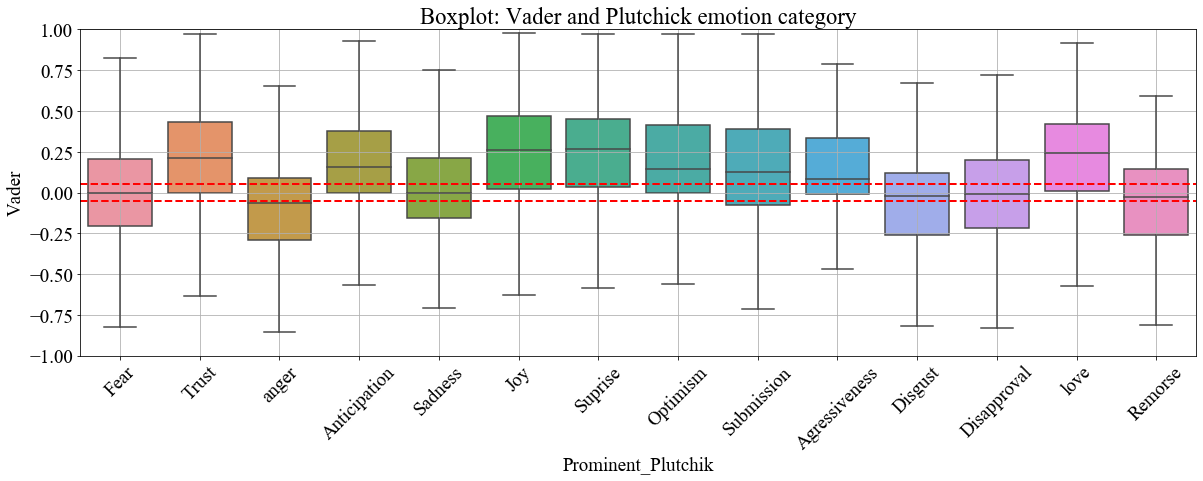

In [135]:
fig,ax = plt.subplots(figsize=(20, 6))
ax = sns.boxplot(x="Prominent_Plutchik", y="Vader", data=result,order= Dataframe_Plutchik.index.values.tolist(),showfliers=False)
plt.xticks(rotation= 45)
plt.ylim(-1, 1)
plt.axhline(y=0.05, linewidth=2,color = "red",linestyle='--')
plt.axhline(y=-0.05, linewidth=2,color = "red",linestyle='--')
plt.title('Boxplot: Vader and Plutchick emotion category')
plt.grid()

plt.savefig(r"C:\Users\stan\Desktop\Rapport_Semester\Image\Boxplot_vader.png", 
            #This is simple recomendation for publication plots
            dpi=1000, 
            # Plot will be occupy a maximum of available space
            bbox_inches='tight', 
            )

# Correlation Length dialog and number of words



In [136]:
corr = result.loc[(result["Size"]<=80) & (result["Nbr_Row"]<=60)].copy().rename(columns={"Nbr_Row": "#Row in a dialog","Size" : "Mean lenght Row in a dialog"})
corr_TA = result_TA.loc[(result_TA["Size"]<=80) & (result_TA["Nbr_Row"]<=60)].copy().rename(columns={"Nbr_Row": "#Row in a dialog","Size" : "Mean lenght Row in a dialog"})

C:\Users\stan\AppData\Local\Continuum\anaconda3\envs\ada\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



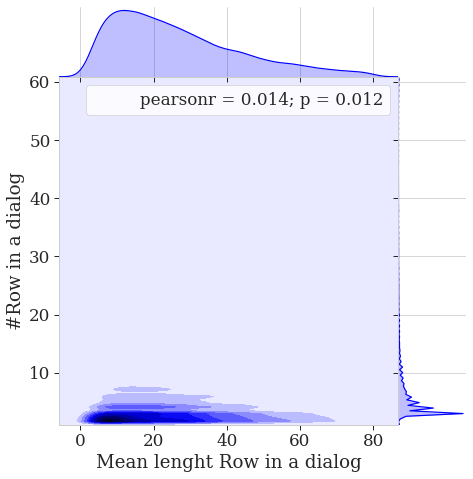

In [137]:
import scipy.stats as stats
import seaborn as sns

sns.set_context("paper",font_scale=1.9)
sns.set_style("whitegrid",{ 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'font.family':'serif', 
 'font.serif':['Times New Roman']})

sns.jointplot(x=corr["Mean lenght Row in a dialog"], y=corr["#Row in a dialog"], kind='kde', color="blue", space=0,label="Manually_segmented",height= 7).annotate(stats.pearsonr)

plt.savefig(r"C:\Users\stan\Desktop\Rapport_Semester\Image\Corr_Manu.png", 
            #This is simple recomendation for publication plots
            dpi=1000, 
            # Plot will be occupy a maximum of available space
            bbox_inches='tight', 
            )


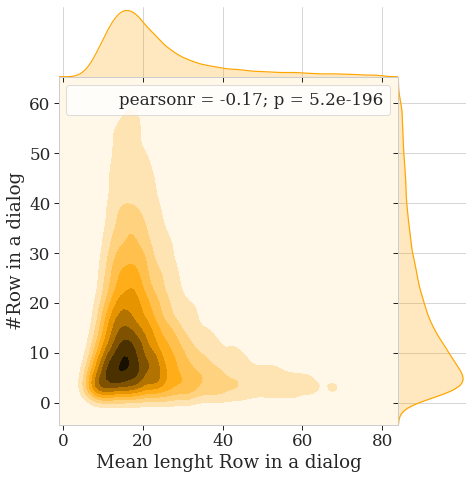

In [138]:
sns.set_context("paper",font_scale=1.9)
sns.set_style("whitegrid",{ 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'font.family':'serif', 
 'font.serif':['Times New Roman']})

sns.jointplot(x=corr_TA["Mean lenght Row in a dialog"], y=corr_TA["#Row in a dialog"], kind='kde', color="orange", space=0,height= 7).annotate(stats.pearsonr)

plt.savefig(r"C:\Users\stan\Desktop\Rapport_Semester\Image\Corr_Auto.png", 
            #This is simple recomendation for publication plots
            dpi=1000, 
            # Plot will be occupy a maximum of available space
            bbox_inches='tight', 
            )